<a href="https://colab.research.google.com/github/Codeadi01/RL/blob/main/RL_EXP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

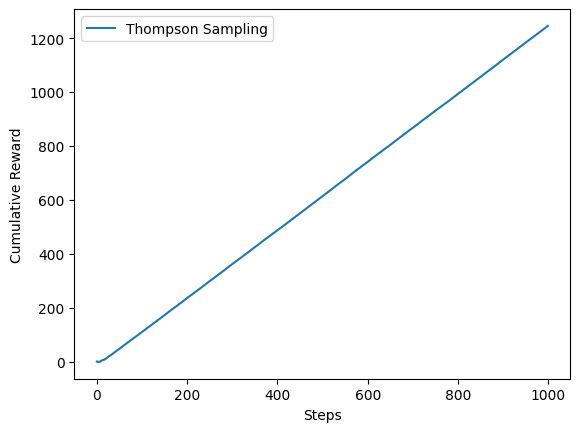

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the true rewards of each arm (slot machine)
def simulate_true_rewards(num_arms):
    return np.random.normal(0, 1, num_arms)

# Thompson Sampling algorithm
def thompson_sampling(num_arms, num_steps):
    true_rewards = simulate_true_rewards(num_arms)
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)

    total_rewards = 0
    cumulative_rewards = []

    for step in range(num_steps):
        sampled_means = np.random.beta(successes + 1, failures + 1)
        arm_to_pull = np.argmax(sampled_means)
        reward = true_rewards[arm_to_pull] + np.random.normal(0, 0.1)  # Add some noise to the reward
        total_rewards += reward

        # Update successes and failures
        if np.random.rand() < (reward + 1) / 2:  # Assuming rewards are in the range [-1, 1]
            successes[arm_to_pull] += 1
        else:
            failures[arm_to_pull] += 1

        cumulative_rewards.append(total_rewards)

    return cumulative_rewards

# Parameters
num_arms = 5
num_steps = 1000

# Run Thompson Sampling algorithm
thompson_rewards = thompson_sampling(num_arms, num_steps)

# Plot results
plt.plot(thompson_rewards, label='Thompson Sampling')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()
